# Laboratorio 2

# Exercise #1: SW Integrity

La verifica dell'integrità del software scaricato è importante per garantire che il software non è stato manomesso. Il tuo compito è scaricare il codice sorgente stabile GPG e verificarlo la sua firma, uno screenshot deve essere incluso nel file di soluzione contenente la riga che indica con “Good signature from <person> [unknown]”.

1) ho scaricato da gpg source  gnupg-2.2.20.tar.bz2  gnupg-2.2.20.tar.bz2.sig  

2) ho messo la chiave pubblica in un file key.asc

3) gpg --import key.asc

4)  gpg --verify gnupg-2.2.20.tar.bz2.sig gnupg-2.2.20.tar.bz2

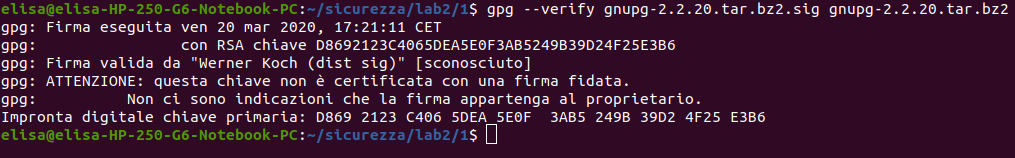

In [1]:
from IPython.display import Image
Image(filename='immagine.png')

# Exercise #2: Key generation

Per usare GPG devi prima creare una coppia di chiavi pubblica e privata. La chiave pubblica è così chiamato perché lo condividerai con altri in modo che possano utilizzarlo per inviarti informazioni segrete,
dall'altro lato la chiave privata viene utilizzata per decodificare qualsiasi informazione codificata con il tuo pubblico chiave. Seguire i passaggi del video per generare una coppia di chiavi (pubblica e privata). Esportare e includi la tua chiave pubblica nel file delle soluzioni.

gpg –full-gen-key

gpg --armor --export elisa.notarangelo@studenti.unimi.it > mykey.asc

# Exercise #3: Send a secret message

Più in profondità, è necessario disporre della chiave pubblica di chiunque altro se si desidera inviare dati crittografati. Ogni persona che utilizza GPG ha due chiavi, una pubblica e una privata. La tua chiave pubblica è usato da altre persone per crittografare le informazioni che vogliono inviarti e quando ricevi un
messaggio crittografato da qualcuno, usi la tua chiave privata per decrittografarlo. Sei l'unico persona che può decrittografare il messaggio segreto perché sei l'unico che ha il chiave privata, con la passphrase che la sblocca. Lo studente deve crittografare il dato secret_file.pdf con la seguente chiave pubblica e includi il file crittografato nel file soluzione.

gpg --import key.asc

gpg -e -o segret_file.pdf.gpg -r 8ACADC10948EF08D secret_file.pdf

# Exercise #4: Digital signature

Una firma digitale è una tecnica crittografica utilizzata per convalidare l'autenticità e l'integrità
di un file o di un messaggio. Per firmare un documento, il primo passo è generare l'hash e quindi
crittografarlo con la chiave privata. Il motivo per crittografare l'hash anziché l'intero messaggio è che una funzione hash può convertire un input arbitrario in un valore di lunghezza fissa, che di solito è molto più breve. Qualsiasi cambiamento nei dati (anche un singolo carattere di dati) lo farà risulta in un valore diverso. Chiunque può convalidare l'integrità dei dati utilizzando il firmatario chiave pubblica per decrittografare l'hash e verificare se corrisponde. Il tuo compito è trovare il PDF firmato
all'interno della directory lab02_digitalsign. Aggiungi il tuo segno digitale e invia il file
indietro. Inoltre, devi firmare il file crittografato nell'esercizio 3 con un segno distaccato e allegarlo
il file della firma.

gpg -v -v --verify-files *

gpg -o GPG_basics_firmato.pdf --sign 'GPG basics.pdf'

gpg --output doc.sig --detach-sig segret_file.pdf.gpg 


# Exercise #5: Key signing

Il livello di attendibilità della chiave privata è correlato al livello di attendibilità delle persone che l'hanno firmata. Invita alcuni dei tuoi colleghi, quelli di cui ti fidi di più, a firmare la tua chiave pubblica. Descrivi anche il protocollo impostato per la verifica della loro identità e assicurarsi che non firmeranno con a chiave falsa.

1)prendi la chiave fai gpg --import nome_chiave.asc

2)gpg --sign-key mail

3)esportala chiave gpg --export --armor mail

4)scambia la chiave , importala, firmala gpg --sign-key mail_amico , esportala gpg --export --armor -o nomefile mail_amico

importare la propria
gpg --list-sig nome_chiave.asc per cotrollare  

# Password cracking

# Exercise #6: Single cracking

John the Ripper è un software di cracking delle password utilizzato per i test di sicurezza delle password. esso combina una serie di modalità di cracking in un unico strumento, rileva automaticamente i tipi di hash della password e include un cracker personalizzabile.
Il modo più semplice che puoi usare per decifrare la password tramite John è "Single cracking"
modalità, utilizzerà i nomi di accesso, i campi "GECOS", i campi "Nome completo" e la home degli utenti
nomi di directory come candidati per le password, anche con un ampio set di regole di permutazioni
applicato. "Single craking" è la modalità con cui dovresti sempre iniziare a crackare.
All'interno della directory lab02_simplecracking è presente un file password unix, è necessario decifrare tutto
la password in esso.

john --single passwd

Warning: Only 15 candidates buffered for the current salt, minimum 16 needed for performance.

Warning: Only 9 candidates buffered for the current salt, minimum 16 needed for performance.

Warning: Only 8 candidates buffered for the current salt, minimum 16 needed for performance.

doejohn7         (john)

Millera          (madam)

Warning: Only 14 candidates buffered for the current salt, minimum 16 needed for performance.

tom23            (tom)

white123         (alfred)

# Exercise #7: Wordlist

Come sapete, non tutti gli utenti utilizzano password crackabili tramite "modalità singola", molti di loro usano password che non sono collegate ai campi di informazioni personali dell'utente. In questo caso il
La modalità "single crack" non è utile. Attraverso la modalità "elenco di parole", John usa un dizionario di parole e confronta gli hash delle parole presenti nel dizionario con la password hash. Possiamo usare qualsiasi elenco di parole desiderato, John ha anche una password.lst che contiene la maggior parte delle password comuni. Gli studenti devono decifrare tutte le password all'interno della directory lab02_wordlistcracking
con la modalità elenco parole (è già incluso un semplice dizionario).

john --wordlist:dictionary.txt passwd

c7b2f531         (eve)

john --wordlist:password.lst passwd
    
dark1            (Admin)

tech             (bob)

john --wordlist:password-top-10000.txt passwd
    
myPa55w0rd       (alice)

# Exercise #8: Bruteforce

Quando una password non è comune, ci sono meno possibilità di trovarla in un dizionario, in questo
case La modalità "incrementale" di John implementa un attacco di forza bruta che prova tutte le password
hash in un determinato spazio di parole (es. lettere minuscole). Ricorda che questo attacco può essere solo
completato correttamente se la lunghezza della password è piccola; possiamo supporre che il cracking con
questa modalità non terminerà mai perché il numero di combinazioni è troppo grande
(in realtà, terminerà se imposti un limite di lunghezza della password bassa) e dovrai interromperlo
in precedenza. Lo studente deve decifrare tutta la password nella directory lab02_bruteforce
utilizzando la modalità incrementale john.
Nota: la password può essere minuscola a-z o 0-9 cifre, non entrambe contemporaneamente. Tutti
le password hanno una lunghezza massima di 6 caratteri.

john --incremental=Digits passwd

56820            (Ray)

john --incremental=Alpha passwd

sevys            (Willy)

john --incremental=Digits --max-length=6 passwd

744510           (andrew)

# Exercise #9: Going on the net

Trova e scarica un file di password tramite google e alcuni dizionari correlati, usa John e riporta i risultati

https://openwall.info/wiki/john/sample-hashes
usare common.txt di john-the-ripper

john --wordlist:common.txt pw-fake-unix